# MGSC 404 Foundations of Decision Analytics 

## Last Name:  Toronga
## First Name: Nicholas Tariro
## Student ID: 260715831

# Lab 5: Simulation

Please complete this notebook by filling in the cells provided. 

**Reading**: Textbook chapter [9](https://www.inferentialthinking.com/chapters/09/randomness.html) and [10](https://www.inferentialthinking.com/chapters/10/Sampling_and_Empirical_Distributions)

You **must** provide your answer in the designated space. No need to write explanations for your answers unless required. 

Deadline:

This lab assignment is **due Thursday, October 11 at the beginging of class**. Please submit a printed **hard copy**. Late work will not be accepted. 

Tips: 

1. Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies to learn more about how to learn cooperatively. Also, questions that puzzle you are likely to have puzzled many Python learners in the past. **Try Googling your questions for answers from online**. In addtion, [this documentation](http://data8.org/datascience/) is a great reference for table operations.  

2. You should start early so that you have time to get help if you're stuck. Drop-in office hours are Thuesday and Thursday 2:30pm-3:30pm in my office 524 Bronfman, right after our class meeting time. 

3. You will get a much smoother start if you play with the lecture notebook before starting. 

## Please write down the names of your collaborator(s) in the cell below:

(name 1), (name 2),...

In [93]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

%matplotlib inline
import matplotlib.pyplot as plt
plots.style.use('fivethirtyeight')
from datetime import datetime, timedelta

## 1. Sampling Basketball Players (40 points)


This exercise uses salary data and game statistics for basketball players from the 2014-2015 NBA season. The data were collected from [basketball-reference](http://www.basketball-reference.com) and [spotrac](http://www.spotrac.com).

Run the next cell to load the two datasets.

In [7]:
player_data = Table.read_table('player_data.csv')
salary_data = Table.read_table('salary_data.csv')
player_data.show(3)
salary_data.show(3)


Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
James Harden,25,HOU,81,459,565,154,60,321,2217
Chris Paul,29,LAC,82,376,838,156,15,190,1564
Stephen Curry,26,GSW,80,341,619,163,16,249,1900


PlayerName,Salary
Kobe Bryant,23500000
Amar'e Stoudemire,23410988
Joe Johnson,23180790


array(['James Harden', 'Chris Paul', 'Stephen Curry', 'Anthony Davis',
       'DeAndre Jordan', 'Jimmy Butler', 'Damian Lillard',
       'Russell Westbrook', 'Pau Gasol', 'Kyrie Irving', 'LeBron James',
       'Tyson Chandler', 'Marc Gasol', 'Tim Duncan', 'Rudy Gobert',
       'Blake Griffin', 'Klay Thompson', 'Gordon Hayward', 'Al Horford',
       'Kevin Love', 'LaMarcus Aldridge', 'Marcin Gortat',
       'Kawhi Leonard', 'Draymond Green', 'Derrick Favors',
       'Paul Millsap', 'Jonas Valanciunas', 'Danny Green', 'John Wall',
       'Andre Drummond', 'Jeff Teague', 'Kyle Korver', 'Dirk Nowitzki',
       'Zach Randolph', 'Kyle Lowry', 'Eric Bledsoe', 'DeMarre Carroll',
       'Ty Lawson', 'Brook Lopez', 'Nikola Vucevic', 'Mike Conley',
       'Goran Dragic', 'Greg Monroe', 'Tristan Thompson',
       'Harrison Barnes', 'Khris Middleton', 'J.J. Redick',
       'Trevor Ariza', 'Lou Williams', 'Tyler Zeller', 'Enes Kanter',
       'Ed Davis', 'Giannis Antetokounmpo', 'Wesley Matthews', '

**Question 1.** We would like to relate players' game statistics to their salaries.  Compute a table called `full_data` that includes one row for each player who is listed in both `player_data` and `salary_data`.  It should include all the columns from `player_data` and `salary_data`, except the `"PlayerName"` column.

*Hint: recall the `join` method* 

In [9]:
if np.all(player_data["Name"] == salary_data["PlayerName"]):
    full_data = player_data.join("Name", salary_data, "PlayerName")
full_data
#I was not sure whether all the names in salary_data were also available in player_data

Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points,Salary
A.J. Price,28,TOT,26,32,46,7,0,14,133,62552
Aaron Brooks,30,CHI,82,166,261,54,15,157,954,1145685
Aaron Gordon,19,ORL,47,169,33,21,22,38,243,3992040
Adreian Payne,23,TOT,32,162,30,19,9,44,213,1855320
Al Horford,28,ATL,76,544,244,68,98,100,1156,12000000
Al Jefferson,30,CHO,65,548,113,47,84,68,1082,13666667
Al-Farouq Aminu,24,DAL,74,342,59,70,62,55,412,1100602
Alan Anderson,32,BRK,74,204,83,56,5,60,545,1276061
Alec Burks,23,UTA,27,114,82,17,5,52,374,3034356
Alex Kirk,23,CLE,5,1,1,0,0,0,4,507336


Basketball team managers would like to hire players who perform well but don't command high salaries.  From this perspective, a very crude measure of a player's *value* to their team is the number of points the player scored in a season for every **\$1000 of salary** (*Note*: the `Salary` column is in dollars, not thousands of dollars). For example, Al Horford scored 1156 points and has a salary of 12,000 thousands of dollars, so his value is $\frac{1156}{12000}=0.09633$.

**Question 2.** Create a table called `full_data_with_value` that's a copy of `full_data`, with an extra column called `"Value"` containing each player's value (according to our crude measure).  Then make a histogram of players' values.  **Specify bins that make the histogram informative, and don't forget your unit (pts/k$)!**

*Hint*: 1. You can use either the `apply` function or array operations to generate the new column. 2. Informative histograms contain a majority of the data and exclude outliers. 

In [12]:
full_data.where("Name", are.containing("Al Horford"))

Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points,Salary
Al Horford,28,ATL,76,544,244,68,98,100,1156,12000000


/Users/nic_toronga/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


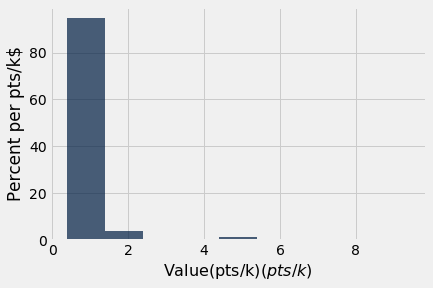

In [237]:
value = full_data["Points"]/(full_data["Salary"]/1000)
full_data_with_value = full_data.with_columns("Value(pts/k$)", value)
full_data_with_value.num_columns
full_data_with_value.hist(11, bins = np.arange(0.4, 10), unit = "pts/k$")


Now suppose we weren't able to find out every player's salary.  (Perhaps it was too costly to interview each player.)  Instead, we have gathered a *simple random sample* of 100 players' salaries.  The cell below loads those data.

In [38]:
sample_salary_data = Table.read_table("sample_salary_data.csv")
sample_salary_data



PlayerName,Salary
Aaron Brooks,1145685
Adreian Payne,1855320
Al Horford,12000000
Alex Kirk,507336
Alonzo Gee,1063384
Amar'e Stoudemire,23410988
Ben McLemore,3026280
Brandon Bass,6900000
Brandon Jennings,8000000
Brandon Knight,3553917


**Question 3.** Make a histogram of the values of the players in `sample_salary_data`, using the same method for measuring value we used in question 2.  **Use the same bins, too.**  *Hint:* This will take several steps.

PlayerName,Salary
Aaron Brooks,1145685
Adreian Payne,1855320
Al Horford,12000000
Alex Kirk,507336
Alonzo Gee,1063384


/Users/nic_toronga/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


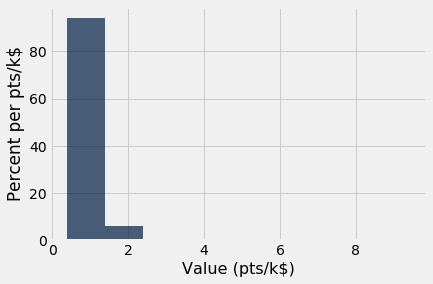

In [239]:
# Use this cell to make your histogram.
#joining the tables to get points

sample_salary_data_pts = sample_salary_data.join("PlayerName", full_data, "Name")
sample_salary_data_pts
#verifying the table
sample_salary_data.sort("PlayerName", descending = False).show(5)
var = sample_salary_data_pts["Points"]/(sample_salary_data_pts["Salary"]/1000)
final_data =sample_salary_data_pts.with_columns("Value", var).drop("Salary_2")

final_data.hist(11, bins = np.arange(.4, 10), unit = "pts/k$")


**Question 4.** For which range of values does the plot in question 3 better depict the distribution of the **population's player values**: 0 to 0.5, or above 0.5? 

*From 0 to 0.5 it better depicts the population's distribution. There is no disjoint such as that found for values that are greater than 2.0*

## 2. How Many Devices? (35 Points)

When a company produces medical devices, it must be sure that its devices will not fail.  Sampling is used ubiquitously in the medical device industry to test how well devices work.

Suppose you work at a company that produces syringes, and you are responsible for ensuring the syringes work well.  After studying the manufacturing process for the syringes, you have a hunch that they have a 1% failure rate.  That is, you suspect that 1% of the syringes won't work when a doctor uses them to inject a patient with medicine.

To test your hunch, you would like to find at least one faulty syringe.  You hire an expert consultant who can test a syringe to check whether it is faulty.  But the expert's time is expensive, so you need to avoid checking more syringes than you need to.

**Important note:** This exercise asks you to compute numbers that are related to probabilities.  For all questions, you can first calculate your answer using what you learned about binomial distribution from a statistics course such as MGCR 271 (no need to show this work). Then, write and run a simulation to compute an approximately-correct answer.  An answer based on an appropriate simulation will receive full credit.  When you simulate, use at least **5,000** trials.

**Question 1.** Suppose there is indeed a 1% failure rate among all syringes.  If you check 20 syringes chosen at random from among all syringes, what is the chance that you find at least 1 faulty syringe?  (You may assume that syringes are chosen with replacement from a population in which 1% of syringes are faulty.)  Name your answer `chance_to_find_syringe`.(Please use the simulation approach.)

In [213]:
# For your convenience, we have created a list containing
# 99 copies of the number 0 (to represent good syringes)
# and 1 copy of the number 1 (to represent a bad syringe).
# This may be useful if you run a simulation.  Feel free
# to delete it.
faultiness = np.append(np.zeros(99), 1)

# an empty array to collect the probabilities
chances = make_array()
bad_syringe =0
num_repetitions = 5000
seq = np.arange(num_repetitions)
for i in seq:
    outcomes = np.random.choice(faultiness, 20)
    if (outcomes.any() ==1):
        bad_syringe = bad_syringe + 1
    
chance_to_find_syringe = bad_syringe/5000 
chance_to_find_syringe 












0.1824

**Question 2.** A doctor purchased 30 syringes and found 4 of them to be faulty. Assuming that there is indeed a 1% failure rate, what was the probability of **exactly 4** out of 30 syringes being faulty? (Please use the simulation approach.)

In [234]:
chance_4 =0

for i in seq:
    new_outcomes = np.random.choice(faultiness, 30)
    if (sum(new_outcomes) == 4):
        chance_4 = chance_4 +1

probability_of_four_faulty = chance_4/5000
probability_of_four_faulty 



0.0004

## 3. Predicting Temperatures (25 Points)


In this exercise, we will try to predict the weather in California.  Much of the code is provided for you; you will be asked to understand and run the code and interpret the results.

The US National Oceanic and Atmospheric Administration (NOAA) operates thousands of climate observation stations (mostly in the US) that collect information about local climate.  Among other things, each station records the highest and lowest observed temperature each day.  These data, called "Quality Controlled Local Climatological Data," are publicly available [here](http://www.ncdc.noaa.gov/orders/qclcd/) and described [here](https://www.ncdc.noaa.gov/data-access/land-based-station-data/land-based-datasets/quality-controlled-local-climatological-data-qclcd).

`temperatures.csv` contains an excerpt of that dataset.  Each row represents a temperature reading in Fahrenheit from one station on one day.  (The temperature is actually the highest temperature observed at that station on that day.)  All the readings are from 2015 and from California stations.

In [184]:
temperatures = Table.read_table("temperatures (1).csv")
type(temperatures["Date"])
temperatures
sort_temp = temperatures.sort("Date", descending = False)


Try visualizing the temperature data over time on the next cell: 

Text(0,0.5,'Highest Temperature')

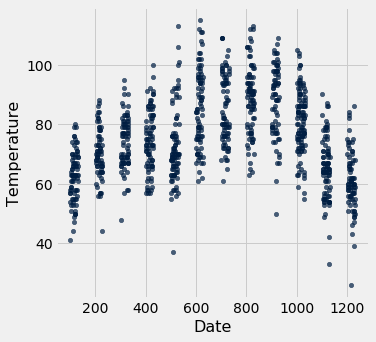

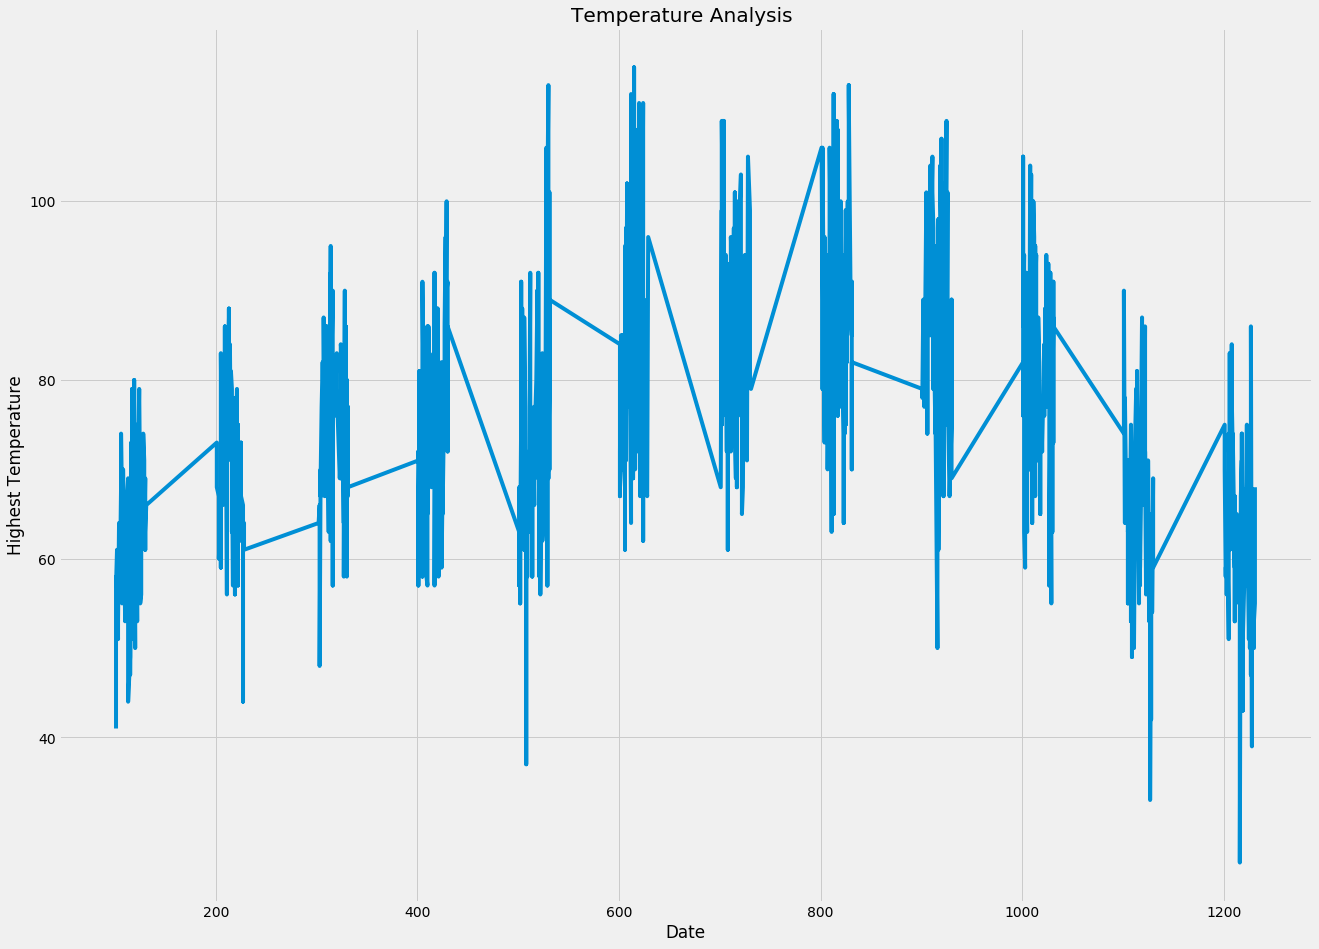

In [241]:


#exploring the histogram
sort_temp.scatter("Date","Temperature" )

#Create a visualization here:
plt.figure(figsize=(20,15))
plt.plot(sort_temp.column(1), sort_temp.column(0))
plt.title("Temperature Analysis ")
plt.xlabel("Date")
plt.ylabel("Highest Temperature")



Each entry in the column "Date" is a number in MMDD format, meaning that the last two digits denote the day of the month, and the first 1 or 2 digits denote the month.

**Question 1.** Why does the data form vertical bands with gaps?

*For some dates, there are no temperatures recorded*

Let us solve that problem.  We will convert each date to the number of days since the start of the year.<br>


**Question 2.** Implement the `get_day_in_month` function. The result should be an integer.<br>
_Hint:_ Use the [remainder operator](https://www.inferentialthinking.com/chapters/03/1/expressions.html).

In [125]:
def get_month(date):
    """The month in the year for a given date.
    
    >>> get_month(315)
    3
    """
    return int(date / 100) # Divide by 100 and round down to the nearest integer

def get_day_in_month(date):
    return int(date%100)

get_day_in_month(315)

15

Next, we'll compute the *day of the year* for each temperature reading, which is the number of days from January 1 until the date of the reading.

In [136]:
# You don't need to change this cell, but you are strongly encouraged
# to read all of the code and understand it.

days_in_month = make_array(31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31)

# A table with one row for each month.  For each month, we have
# the number of the month (e.g. 3 for March), the number of
# days in that month in 2015 (e.g. 31 for March), and the
# number of days in the year before the first day of that month
# (e.g. 0 for January or 59 for March).
days_into_year =  Table().with_columns(
    "Month", np.arange(12)+1,
    "Days until start of month", np.cumsum(days_in_month) - days_in_month)

# First, compute the month and day-of-month for each temperature.
months = temperatures.apply(get_month, "Date")
day_of_month = temperatures.apply(get_day_in_month, "Date")
with_month_and_day = temperatures.with_columns(
    "Month", months,
    "Day of month", day_of_month
)
with_month_and_day
#days_into_year
# Then, compute how many days have passed since 
# the start of the year to reach each date.

t = with_month_and_day.join('Month', days_into_year)
t

day_of_year = t.column('Days until start of month') + t.column('Day of month')
with_dates_fixed = t.drop(0, 6, 7).with_column("Day of year", day_of_year)
with_dates_fixed


Temperature,Date,Latitude,Longitude,Station name,Day of year
71,127,32.7,-117.2,San Diego,27
61,102,34.1167,-119.117,Point Mugu,2
56,126,40.9781,-124.109,Arcata/Eureka,26
55,111,37.3591,-121.924,San Jose,11
67,127,36.3189,-119.629,Hanford,27
69,130,33.6267,-116.159,Palm Springs,30
67,117,32.7,-117.2,San Diego,17
79,124,33.8222,-116.504,Palm Springs,24
73,116,35.2372,-120.641,San Luis Obispo,16
70,128,39.1019,-121.568,Marysville,28


**Question 3**. Set `missing` to an array of all the days of the year (integers from 1 through 365) that do not have any temperature readings in the `with_dates_fixed` dataset.<br>
*Hint:* One strategy is to start with a table of all days in the year, then use the method `exclude` ([docs](http://data8.org/datascience/_autosummary/datascience.tables.Table.exclude.html#datascience.tables.Table.exclude))  to eliminate all of the days of the year that do have a temperature reading. 

In [176]:
days = with_dates_fixed.column("Day of year")
annual_days = Table().with_columns("Days", np.arange(1, 366))
missing = annual_days.exclude(days)
missing.show()






Days
1
15
34
36
58
61
77
81
82
86


Using `with_dates_fixed`, we can make a better scatter plot.

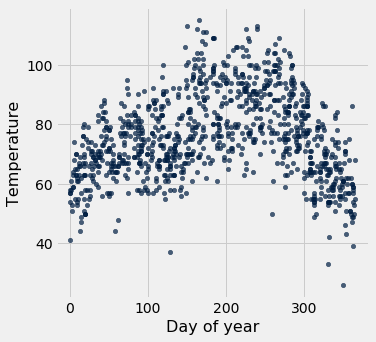

In [156]:
with_dates_fixed.scatter("Day of year", "Temperature")

Let's do some prediction.  For any reading on any day, we will predict its value using all the readings from the week before and after that day.  A reasonable prediction is that the reading will be the average of all those readings.  We will package our code in a function.

In [157]:
def predict_temperature(day):
    """A prediction of the temperature (in Fahrenheit) on a given day at some station.
    """
    nearby_readings = with_dates_fixed.where("Day of year", are.between_or_equal_to(day - 7, day + 7))
    return np.average(nearby_readings.column("Temperature"))

Below we have computed a predicted temperature for each reading in the table and plotted both.  (It may take a **minute or two** to run the cell.)

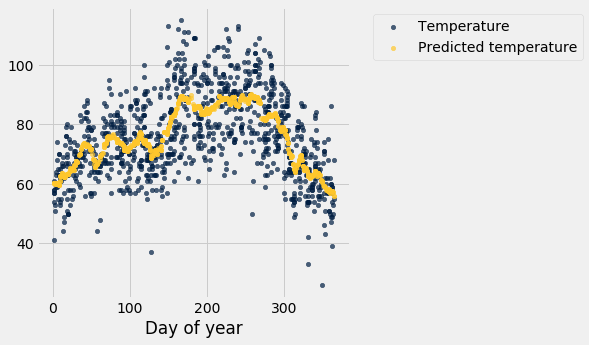

In [158]:
with_predictions = with_dates_fixed.with_column(
    "Predicted temperature",
    with_dates_fixed.apply(predict_temperature, "Day of year"))
with_predictions.select("Day of year", "Temperature", "Predicted temperature")\
                .scatter("Day of year")

**Question 4.** The scatter plot is called a *graph of averages*. Some person thinks that the graph of averages roughly followed a straight line.  Is this observation true for this graph?  Using your knowledge about seasons, explain why or why not. 

*That is false. The graph cannot be linear because the scatterplot shows a pattern that is not linear. In winter the averages will be relatively low compared to summer and fall seasons where temperatures are pretty high. So the ends of the curve that represent the January and December are relatively low as both of them are winter*

**Question 5.** Do you expect the graph of averages for Montreal to be generally below or above this graph of averages? Use one sentence to explain. 

*I would expect it to be lower since Montreal is much colder than California*

# (For instructor use only) 



## Your Grade: 